In [216]:
import openpyxl
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing

from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

from matplotlib import pyplot as plt
import datetime
import math
import pandas as pd
from scipy import stats
import seaborn as sn

from sklearn.tree import export_text

import statsmodels.api as sm

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

# Drops specific values in a dataframe
# if flag = 1, drops values less than 'val'
# if flag = 0, drops values greater than 'val'
def drop_values(dataframe, column, val, flag):
    if flag:
        return dataframe.drop(dataframe[column < val].index)
    else:
        return dataframe.drop(dataframe[column > val].index)
    
# GET THE EGG SENSORS WITH AIRPOINTER
dataframe = pd.read_pickle('EGG2_DATASET.pkl')
dataframe

,Temperature[degC],Humidity[percent],PM1.0[ug/m^3],PM2.5[ug/m^3],PM10.0[ug/m^3],O3[ppb],O3[V],NO2[ppb],NO2[V],Pressure[Pa],NO,NO2,NOx,O3,PM10_conc,PM10-2.5_conc,PM2.5_conc,Air_Temperature,Relative_Humidity
2020-05-06 16:00:00,20.936500,19.845833,1.188333,2.235000,2.576667,50.088667,1.426638,159.735500,1.416693,99177.978333,1.490,3.941,5.639,40.473,15.705,11.404,4.303,12.375,27.602
2020-05-06 17:00:00,20.838500,19.497333,1.536667,2.705000,3.088333,49.248667,1.426650,146.279333,1.416790,99149.185000,1.910,5.132,6.875,40.592,19.672,15.035,4.628,12.848,26.503
2020-05-06 18:00:00,18.088000,21.523500,1.903333,3.203333,3.665000,51.494000,1.426415,126.373333,1.416782,99160.285000,2.493,7.458,9.555,39.162,21.342,16.181,5.170,12.150,27.662
2020-05-06 19:00:00,15.246833,25.020167,2.448333,3.898333,4.298333,53.309000,1.426180,115.848667,1.416693,99190.693333,1.458,10.777,12.126,35.057,16.456,11.442,5.010,11.400,28.912
2020-05-06 20:00:00,13.793333,23.878000,0.660000,1.293333,1.510000,50.617667,1.426136,97.193000,1.416746,99246.608333,0.397,3.695,4.078,38.341,13.062,9.670,3.400,10.556,26.898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-02 09:00:00,18.382167,54.982833,4.668333,6.990000,7.683333,49.023000,1.426488,88.980500,1.417085,99420.093333,2.011,15.731,17.738,27.657,20.897,13.860,7.035,13.705,75.487
2020-06-02 10:00:00,19.135000,53.975500,9.786667,15.533333,17.430000,50.406167,1.426509,88.263833,1.417135,99319.851667,1.870,12.326,14.195,35.710,24.243,13.958,10.296,14.379,73.594
2020-06-02 11:00:00,22.748000,45.981500,3.601667,5.361667,5.930000,49.626000,1.426785,81.485500,1.417416,99221.360000,2.176,7.432,9.608,44.804,19.135,13.056,6.069,16.321,65.023
2020-06-02 12:00:00,27.486833,38.288000,5.126667,6.968333,7.471667,50.460500,1.427153,66.351167,1.417890,99105.386667,2.027,6.718,8.653,48.770,20.522,13.754,6.767,18.859,56.409


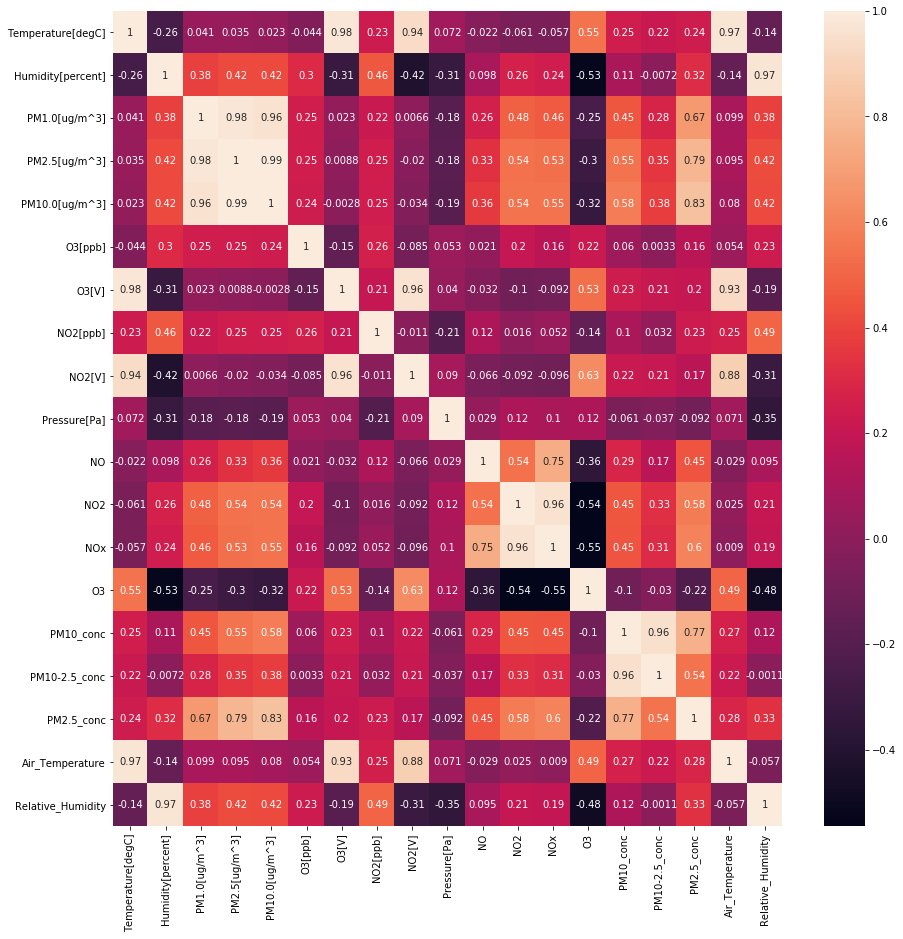

In [2]:
corrMatrix = dataframe.corr()
plt.subplots(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

0.9459749586850176

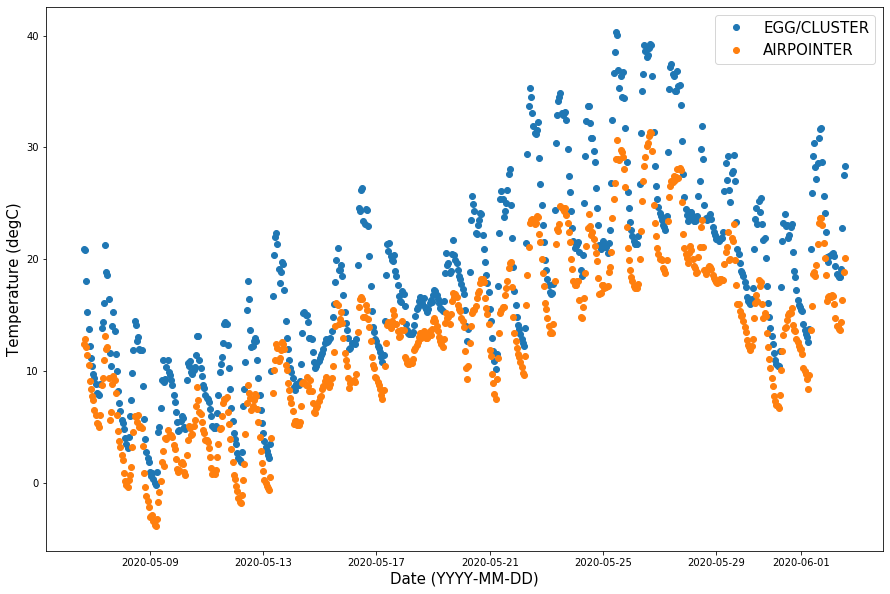

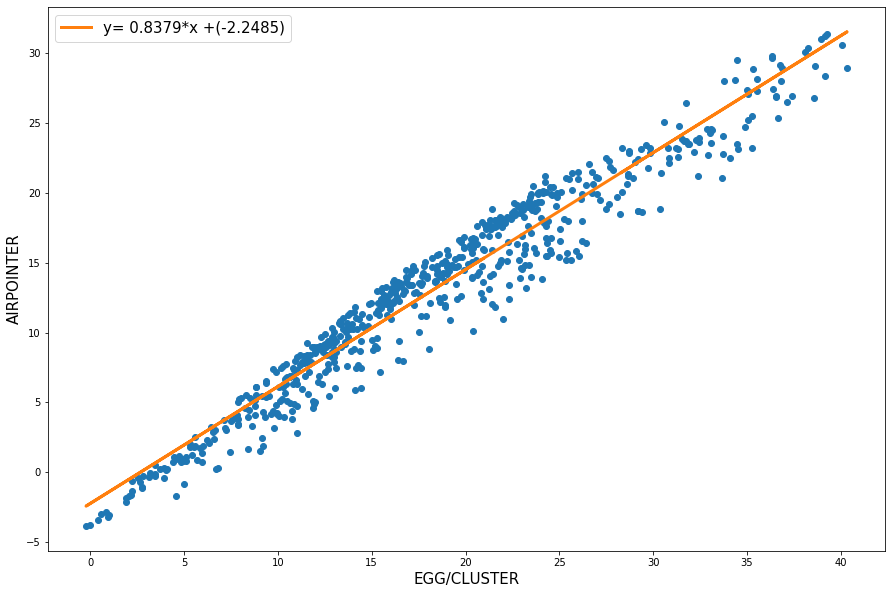

In [3]:
# ----------------------------- TEMPERATURE FROM CLUSTER vs. AIR_TEMPERATURE FROM AIRPOINTER ----------------------------------------
plt.figure(figsize=(15,10))
plt.plot(dataframe.index.to_series(), dataframe['Temperature[degC]'], 'o', label="EGG/CLUSTER")
plt.plot(dataframe.index.to_series(), dataframe['Air_Temperature'], 'o', label='AIRPOINTER')
plt.xlabel('Date (YYYY-MM-DD)', fontsize=15)
plt.ylabel('Temperature (degC)', fontsize=15)
plt.legend(loc='best', fontsize=15)

# Calculate a regression line
# Egg sensor
xValues = dataframe['Temperature[degC]'].to_numpy()
# Airpointer
yValues = dataframe['Air_Temperature'].to_numpy()
# Regression Line
linear_regression = LinearRegression().fit(xValues.reshape(-1,1), yValues)
# Plot the values graph with the regression line
plt.figure(figsize=(15,10))
plt.plot(xValues, yValues, 'o')
plt.plot(xValues, 
         linear_regression.predict(xValues.reshape(-1,1)),
         label='y= {:0.4f}*x +({:0.4f})'.format(linear_regression.coef_[0], linear_regression.intercept_),
         linewidth=3)
plt.xlabel('EGG/CLUSTER', fontsize=15)
plt.ylabel('AIRPOINTER', fontsize=15)
plt.legend(loc='best', fontsize=15)

# Calculate the R2 score
metrics.r2_score(yValues, linear_regression.predict(xValues.reshape(-1,1)))

0.9493082204398136

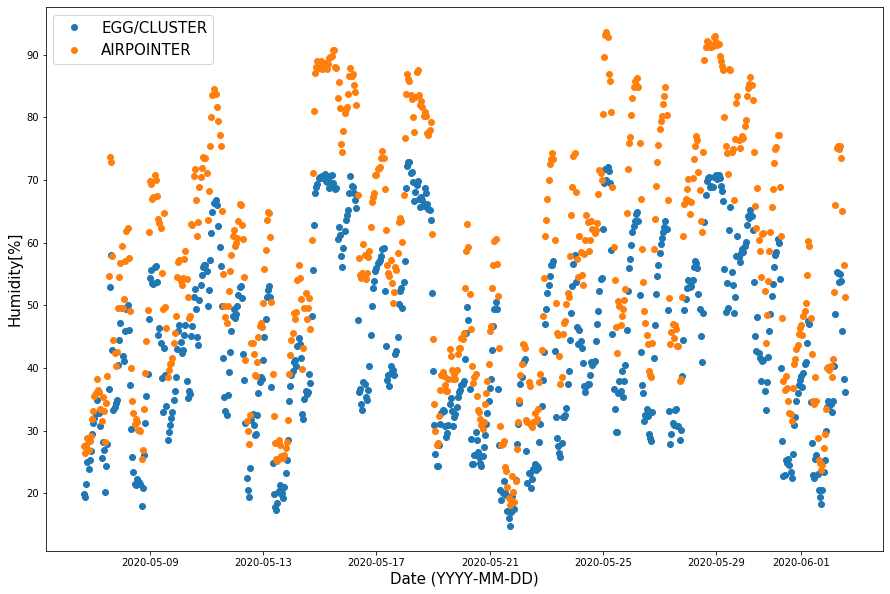

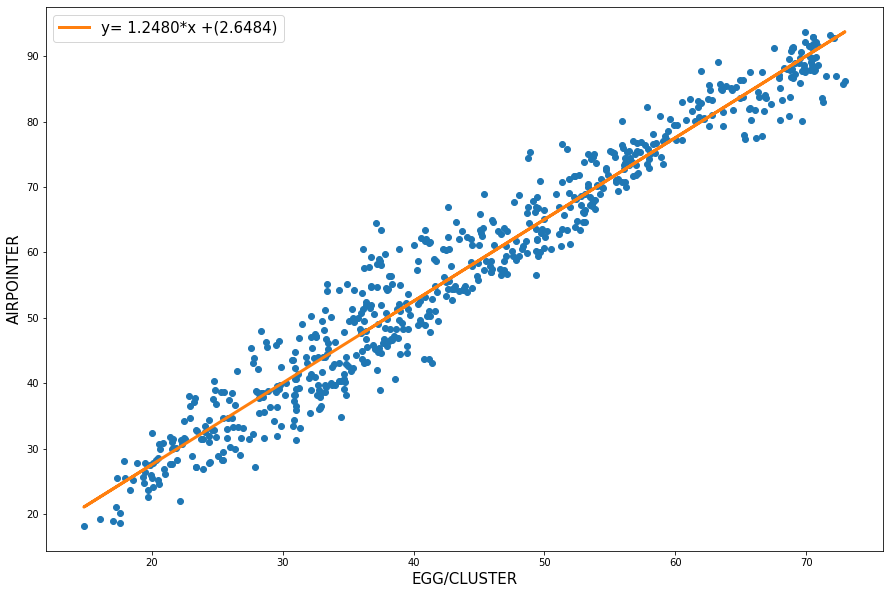

In [4]:
# ----------------------------- HUMIDITY FROM CLUSTER vs. HUMIDITY FROM AIRPOINTER ----------------------------------------
plt.figure(figsize=(15,10))
plt.plot(dataframe.index.to_series(), dataframe['Humidity[percent]'], 'o', label="EGG/CLUSTER")
plt.plot(dataframe.index.to_series(), dataframe['Relative_Humidity'], 'o', label='AIRPOINTER')
plt.xlabel('Date (YYYY-MM-DD)', fontsize=15)
plt.ylabel('Humidity[%]', fontsize=15)
plt.legend(loc='best', fontsize=15)

# Calculate a regression line
# Egg sensor
xValues = dataframe['Humidity[percent]'].to_numpy()
# Airpointer
yValues = dataframe['Relative_Humidity'].to_numpy()
# Regression Line
linear_regression = LinearRegression().fit(xValues.reshape(-1,1), yValues)
# Plot the values graph with the regression line
plt.figure(figsize=(15,10))
plt.plot(xValues, yValues, 'o')
plt.plot(xValues, 
         linear_regression.predict(xValues.reshape(-1,1)),
         label='y= {:0.4f}*x +({:0.4f})'.format(linear_regression.coef_[0], linear_regression.intercept_),
         linewidth=3)
plt.xlabel('EGG/CLUSTER', fontsize=15)
plt.ylabel('AIRPOINTER', fontsize=15)
plt.legend(loc='best', fontsize=15)

# Calculate the R2 score
metrics.r2_score(yValues, linear_regression.predict(xValues.reshape(-1,1)))

0.6209762228694864

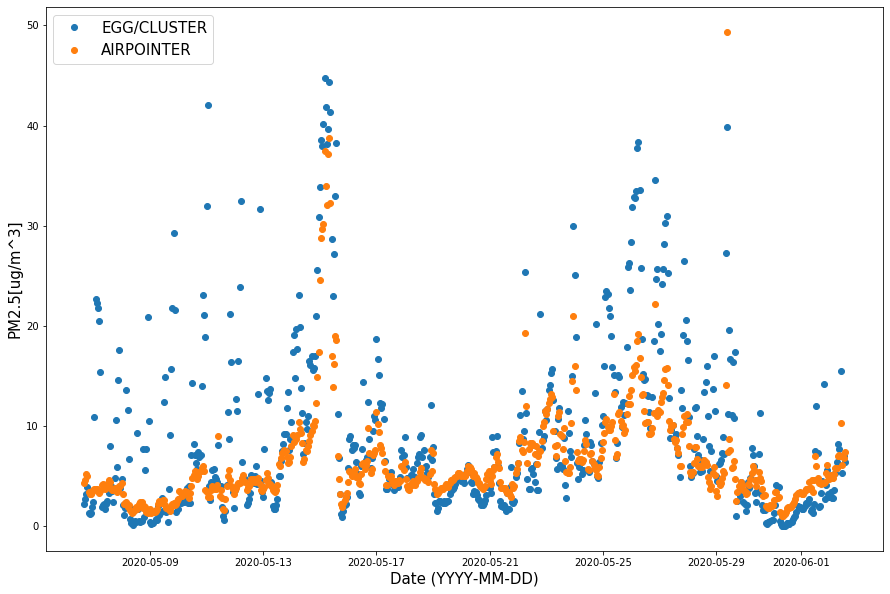

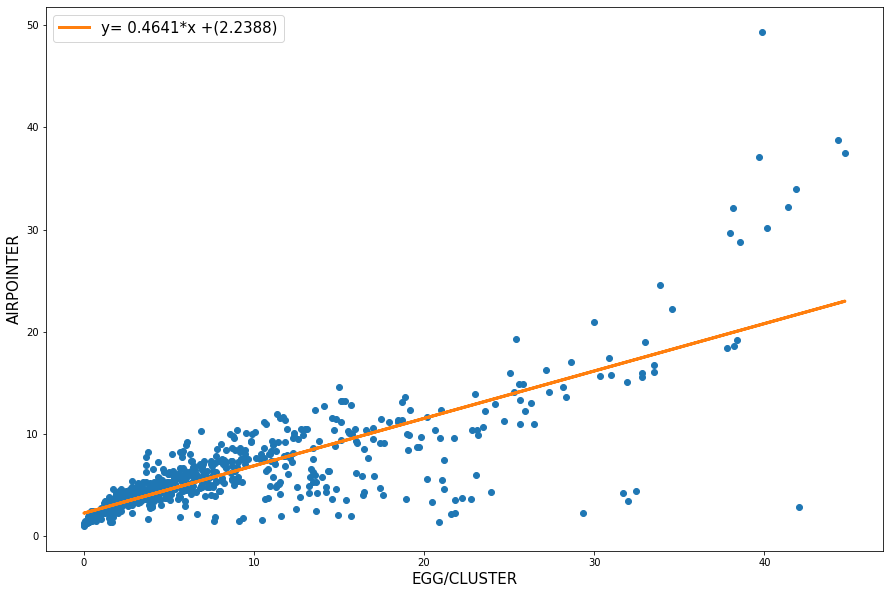

In [5]:
# ----------------------------- PM2.5 FROM CLUSTER vs. PM2.5 FROM AIRPOINTER ----------------------------------------
plt.figure(figsize=(15,10))
plt.plot(dataframe.index.to_series(), dataframe['PM2.5[ug/m^3]'], 'o', label="EGG/CLUSTER")
plt.plot(dataframe.index.to_series(), dataframe['PM2.5_conc'], 'o', label='AIRPOINTER')
plt.xlabel('Date (YYYY-MM-DD)', fontsize=15)
plt.ylabel('PM2.5[ug/m^3]', fontsize=15)
plt.legend(loc='best', fontsize=15)

# Calculate a regression line
# Egg sensor
xValues = dataframe['PM2.5[ug/m^3]'].to_numpy()
# Airpointer
yValues = dataframe['PM2.5_conc'].to_numpy()
# Regression Line
linear_regression = LinearRegression().fit(xValues.reshape(-1,1), yValues)
# Plot the values graph with the regression line
plt.figure(figsize=(15,10))
plt.plot(xValues, yValues, 'o')
plt.plot(xValues, 
         linear_regression.predict(xValues.reshape(-1,1)),
         label='y= {:0.4f}*x +({:0.4f})'.format(linear_regression.coef_[0], linear_regression.intercept_),
         linewidth=3)
plt.xlabel('EGG/CLUSTER', fontsize=15)
plt.ylabel('AIRPOINTER', fontsize=15)
plt.legend(loc='best', fontsize=15)

# Calculate the R2 score
metrics.r2_score(yValues, linear_regression.predict(xValues.reshape(-1,1)))

0.3355558245129451

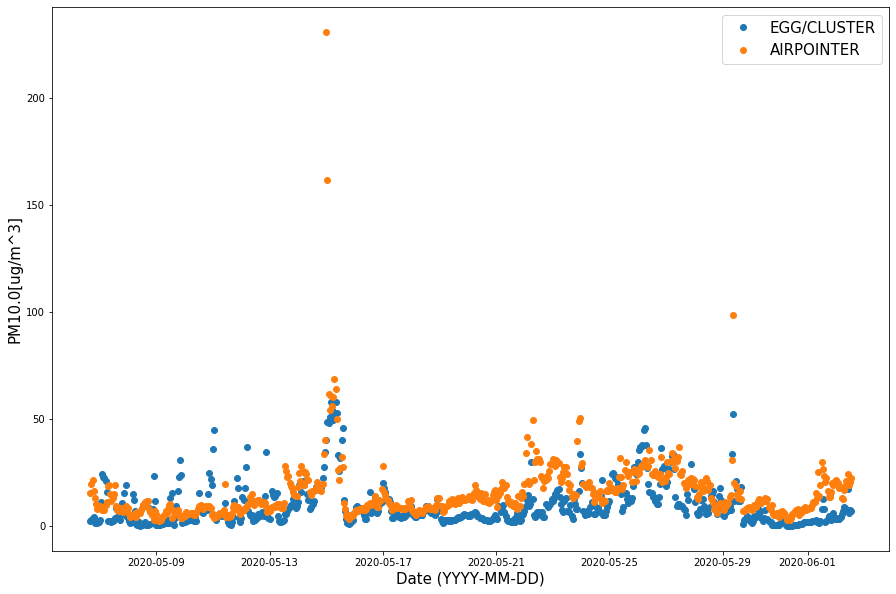

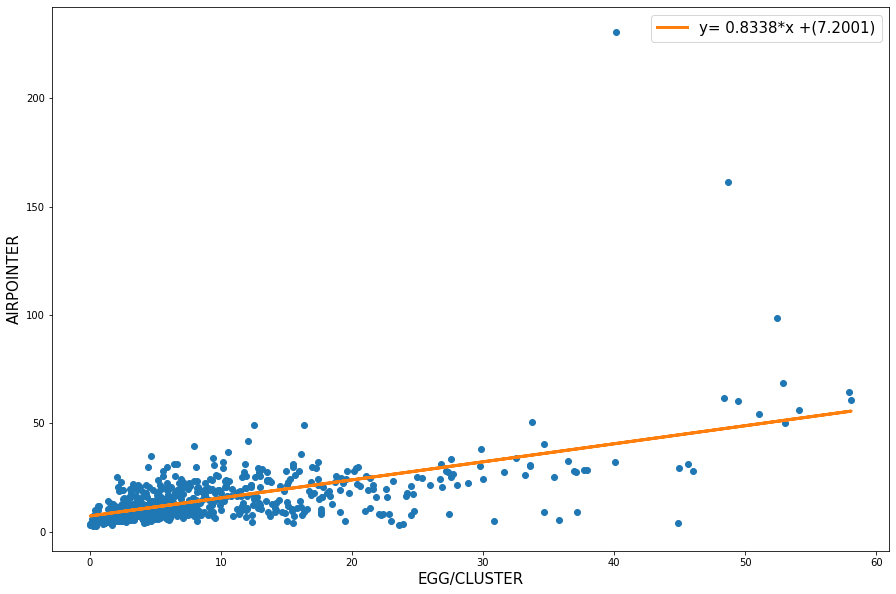

In [6]:
# ----------------------------- PM10.0 FROM CLUSTER vs. PM10.0 FROM AIRPOINTER ----------------------------------------
plt.figure(figsize=(15,10))
plt.plot(dataframe.index.to_series(), dataframe['PM10.0[ug/m^3]'], 'o', label="EGG/CLUSTER")
plt.plot(dataframe.index.to_series(), dataframe['PM10_conc'], 'o', label='AIRPOINTER')
plt.xlabel('Date (YYYY-MM-DD)', fontsize=15)
plt.ylabel('PM10.0[ug/m^3]', fontsize=15)
plt.legend(loc='best', fontsize=15)

# Calculate a regression line
# Egg sensor
xValues = dataframe['PM10.0[ug/m^3]'].to_numpy()
# Airpointer
yValues = dataframe['PM10_conc'].to_numpy()
# Regression Line
linear_regression = LinearRegression().fit(xValues.reshape(-1,1), yValues)
# Plot the values graph with the regression line
plt.figure(figsize=(15,10))
plt.plot(xValues, yValues, 'o')
plt.plot(xValues, 
         linear_regression.predict(xValues.reshape(-1,1)),
         label='y= {:0.4f}*x +({:0.4f})'.format(linear_regression.coef_[0], linear_regression.intercept_),
         linewidth=3)
plt.xlabel('EGG/CLUSTER', fontsize=15)
plt.ylabel('AIRPOINTER', fontsize=15)
plt.legend(loc='best', fontsize=15)

# Calculate the R2 score
metrics.r2_score(yValues, linear_regression.predict(xValues.reshape(-1,1)))

0.04772901020153664

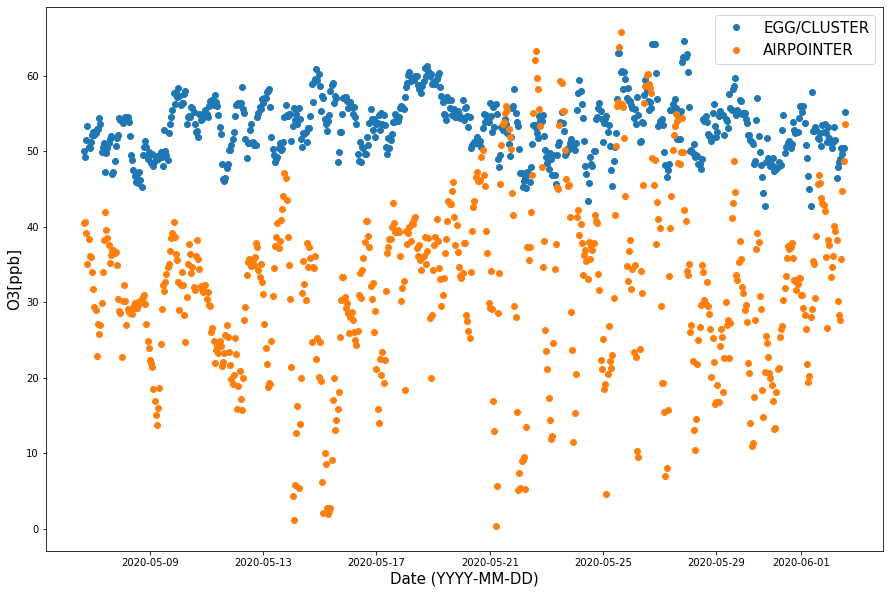

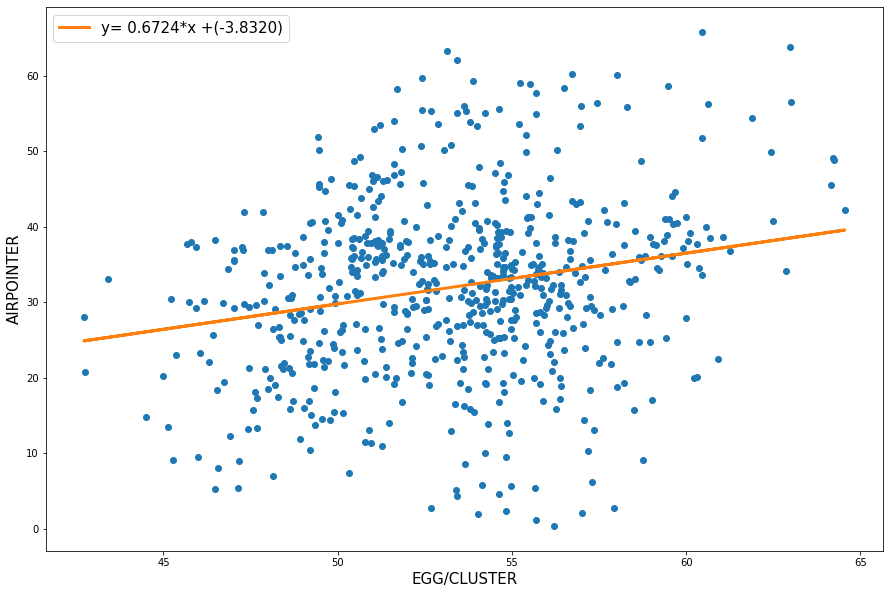

In [7]:
# ----------------------------- O3 (OZONE) FROM CLUSTER vs. O3 (OZONE) FROM AIRPOINTER ----------------------------------------
plt.figure(figsize=(15,10))
plt.plot(dataframe.index.to_series(), dataframe['O3[ppb]'], 'o', label="EGG/CLUSTER")
plt.plot(dataframe.index.to_series(), dataframe['O3'], 'o', label='AIRPOINTER')
plt.xlabel('Date (YYYY-MM-DD)', fontsize=15)
plt.ylabel('O3[ppb]', fontsize=15)
plt.legend(loc='best', fontsize=15)

# Calculate a regression line
# Egg sensor
xValues = dataframe['O3[ppb]'].to_numpy()
# Airpointer
yValues = dataframe['O3'].to_numpy()
# Regression Line
linear_regression = LinearRegression().fit(xValues.reshape(-1,1), yValues)
# Plot the values graph with the regression line
plt.figure(figsize=(15,10))
plt.plot(xValues, yValues, 'o')
plt.plot(xValues, 
         linear_regression.predict(xValues.reshape(-1,1)),
         label='y= {:0.4f}*x +({:0.4f})'.format(linear_regression.coef_[0], linear_regression.intercept_),
         linewidth=3)
plt.xlabel('EGG/CLUSTER', fontsize=15)
plt.ylabel('AIRPOINTER', fontsize=15)
plt.legend(loc='best', fontsize=15)

# Calculate the R2 score
metrics.r2_score(yValues, linear_regression.predict(xValues.reshape(-1,1)))

0.020776344779411482

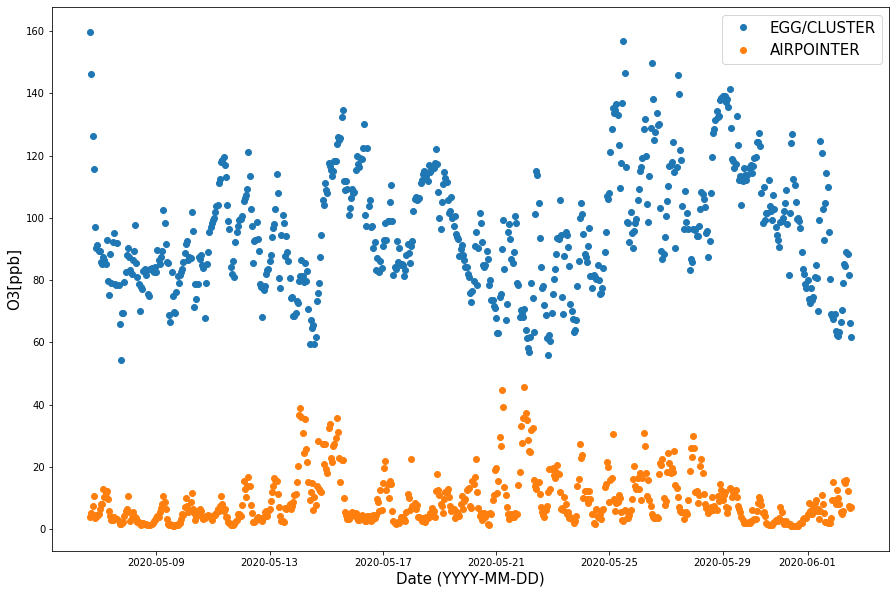

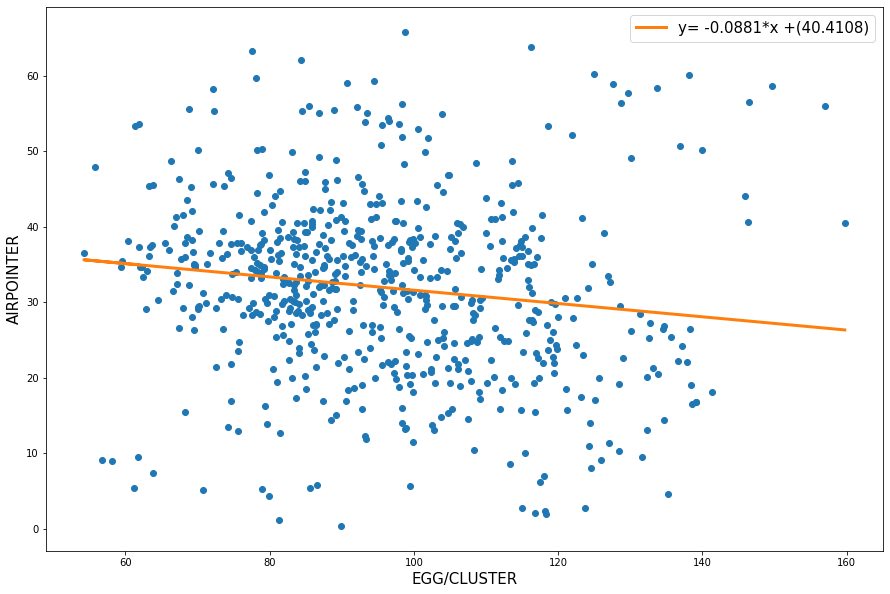

In [67]:
# ----------------------------- NO2 FROM CLUSTER vs. NO2 FROM AIRPOINTER ----------------------------------------
plt.figure(figsize=(15,10))
plt.plot(dataframe.index.to_series(), dataframe['NO2[ppb]'], 'o', label="EGG/CLUSTER")
plt.plot(dataframe.index.to_series(), dataframe['NO2'], 'o', label='AIRPOINTER')
plt.xlabel('Date (YYYY-MM-DD)', fontsize=15)
plt.ylabel('O3[ppb]', fontsize=15)
plt.legend(loc='best', fontsize=15)

# Calculate a regression line
# Egg sensor
xValues = dataframe['NO2[ppb]'].to_numpy()
# Airpointer
yValues = dataframe['O3'].to_numpy()
# Regression Line
linear_regression = LinearRegression().fit(xValues.reshape(-1,1), yValues)
# Plot the values graph with the regression line
plt.figure(figsize=(15,10))
plt.plot(xValues, yValues, 'o')
plt.plot(xValues, 
         linear_regression.predict(xValues.reshape(-1,1)),
         label='y= {:0.4f}*x +({:0.4f})'.format(linear_regression.coef_[0], linear_regression.intercept_),
         linewidth=3)
plt.xlabel('EGG/CLUSTER', fontsize=15)
plt.ylabel('AIRPOINTER', fontsize=15)
plt.legend(loc='best', fontsize=15)

# Calculate the R2 score
metrics.r2_score(yValues, linear_regression.predict(xValues.reshape(-1,1)))

0.879604711518778

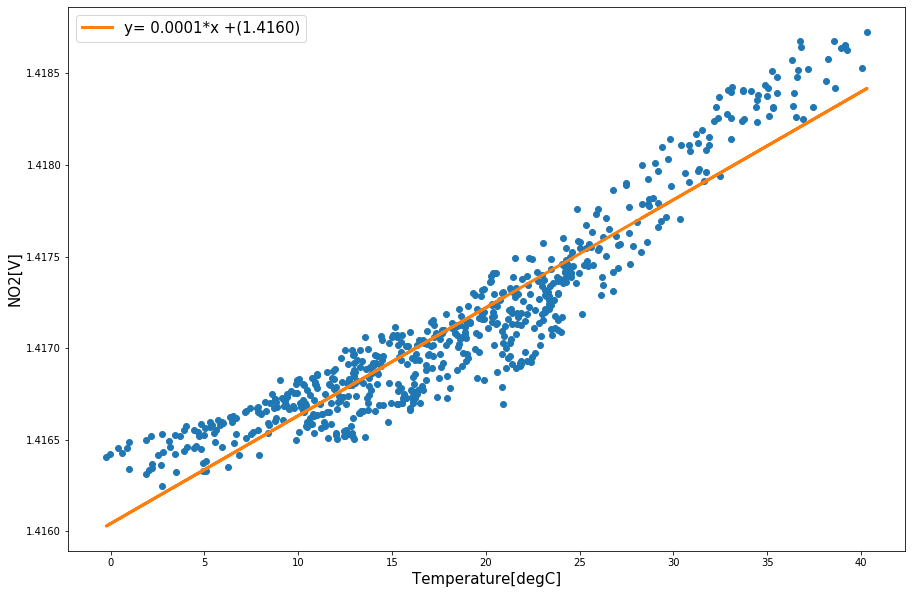

In [71]:
# Calculate a regression line
# Egg sensor
xValues = dataframe['Temperature[degC]'].to_numpy()
# Airpointer
yValues = dataframe['NO2[V]'].to_numpy()
# Regression Line
linear_regression = LinearRegression().fit(xValues.reshape(-1,1), yValues)
# Plot the values graph with the regression line
plt.figure(figsize=(15,10))
plt.plot(xValues, yValues, 'o')
plt.plot(xValues, 
         linear_regression.predict(xValues.reshape(-1,1)),
         label='y= {:0.4f}*x +({:0.4f})'.format(linear_regression.coef_[0], linear_regression.intercept_),
         linewidth=3)
plt.xlabel('Temperature[degC]', fontsize=15)
plt.ylabel('NO2[V]', fontsize=15)
plt.legend(loc='best', fontsize=15)

# Calculate the R2 score
metrics.r2_score(yValues, linear_regression.predict(xValues.reshape(-1,1)))

0.9619404333537256

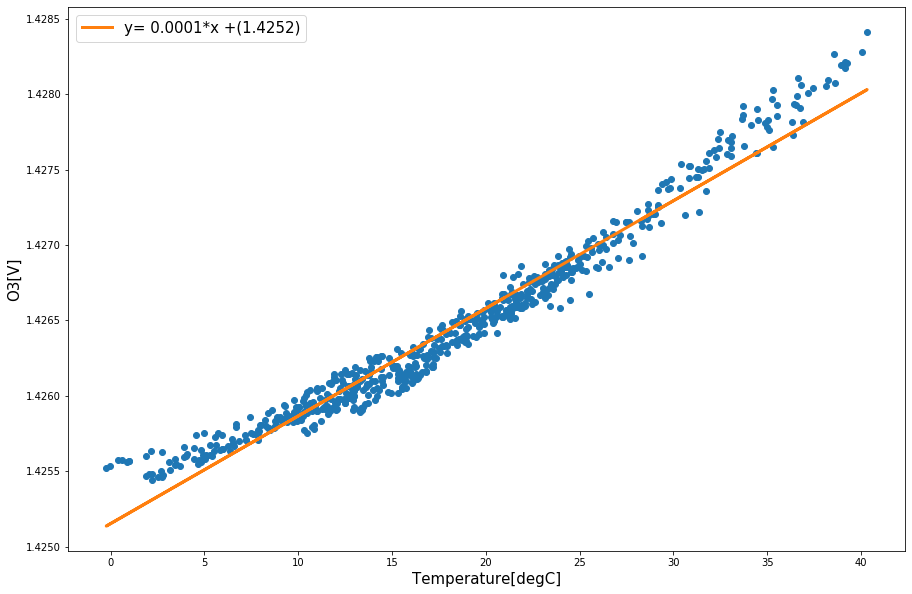

In [73]:
# Calculate a regression line
# Egg sensor
xValues = dataframe['Temperature[degC]'].to_numpy()
# Airpointer
yValues = dataframe['O3[V]'].to_numpy()
# Regression Line
linear_regression = LinearRegression().fit(xValues.reshape(-1,1), yValues)
# Plot the values graph with the regression line
plt.figure(figsize=(15,10))
plt.plot(xValues, yValues, 'o')
plt.plot(xValues, 
         linear_regression.predict(xValues.reshape(-1,1)),
         label='y= {:0.4f}*x +({:0.4f})'.format(linear_regression.coef_[0], linear_regression.intercept_),
         linewidth=3)
plt.xlabel('Temperature[degC]', fontsize=15)
plt.ylabel('O3[V]', fontsize=15)
plt.legend(loc='best', fontsize=15)

# Calculate the R2 score
metrics.r2_score(yValues, linear_regression.predict(xValues.reshape(-1,1)))

0.008549564283249156

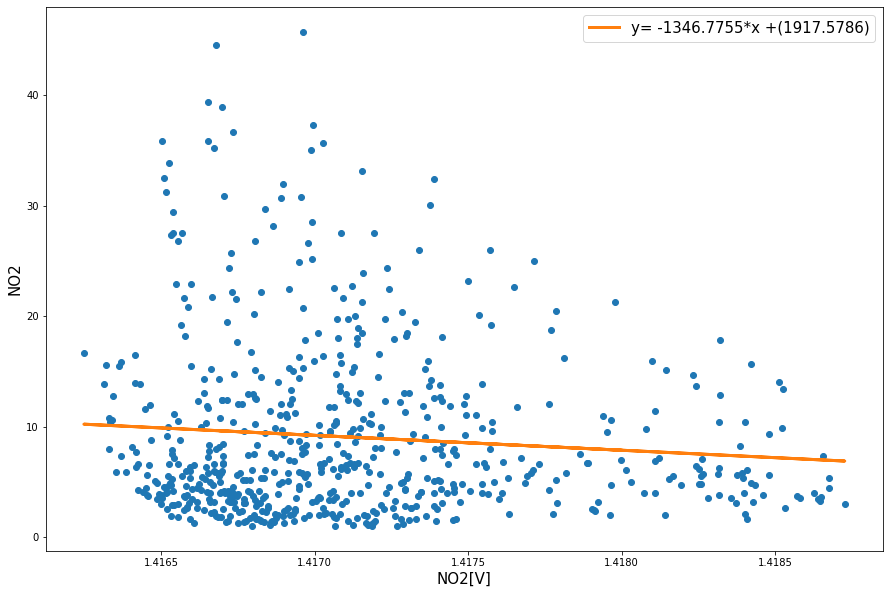

In [74]:
# Calculate a regression line
# Egg sensor
xValues = dataframe['NO2[V]'].to_numpy()
# Airpointer
yValues = dataframe['NO2'].to_numpy()
# Regression Line
linear_regression = LinearRegression().fit(xValues.reshape(-1,1), yValues)
# Plot the values graph with the regression line
plt.figure(figsize=(15,10))
plt.plot(xValues, yValues, 'o')
plt.plot(xValues, 
         linear_regression.predict(xValues.reshape(-1,1)),
         label='y= {:0.4f}*x +({:0.4f})'.format(linear_regression.coef_[0], linear_regression.intercept_),
         linewidth=3)
plt.xlabel('NO2[V]', fontsize=15)
plt.ylabel('NO2', fontsize=15)
plt.legend(loc='best', fontsize=15)

# Calculate the R2 score
metrics.r2_score(yValues, linear_regression.predict(xValues.reshape(-1,1)))

In [182]:
dataframe.head()

,Temperature[degC],Humidity[percent],PM1.0[ug/m^3],PM2.5[ug/m^3],PM10.0[ug/m^3],O3[ppb],O3[V],NO2[ppb],NO2[V],Pressure[Pa],NO,NO2,NOx,O3,PM10_conc,PM10-2.5_conc,PM2.5_conc,Air_Temperature,Relative_Humidity
2020-05-06 16:00:00,20.936500,19.845833,1.188333,2.235000,2.576667,50.088667,1.426638,159.735500,1.416693,99177.978333,1.490,3.941,5.639,40.473,15.705,11.404,4.303,12.375,27.602
2020-05-06 17:00:00,20.838500,19.497333,1.536667,2.705000,3.088333,49.248667,1.426650,146.279333,1.416790,99149.185000,1.910,5.132,6.875,40.592,19.672,15.035,4.628,12.848,26.503
2020-05-06 18:00:00,18.088000,21.523500,1.903333,3.203333,3.665000,51.494000,1.426415,126.373333,1.416782,99160.285000,2.493,7.458,9.555,39.162,21.342,16.181,5.170,12.150,27.662
2020-05-06 19:00:00,15.246833,25.020167,2.448333,3.898333,4.298333,53.309000,1.426180,115.848667,1.416693,99190.693333,1.458,10.777,12.126,35.057,16.456,11.442,5.010,11.400,28.912
2020-05-06 20:00:00,13.793333,23.878000,0.660000,1.293333,1.510000,50.617667,1.426136,97.193000,1.416746,99246.608333,0.397,3.695,4.078,38.341,13.062,9.670,3.400,10.556,26.898


In [184]:
dataframe['NO2-O3[ppb]'] = dataframe['NO2[ppb]'] - dataframe['O3[ppb]']

In [185]:
dataframe.head()

,Temperature[degC],Humidity[percent],PM1.0[ug/m^3],PM2.5[ug/m^3],PM10.0[ug/m^3],O3[ppb],O3[V],NO2[ppb],NO2[V],Pressure[Pa],NO,NO2,NOx,O3,PM10_conc,PM10-2.5_conc,PM2.5_conc,Air_Temperature,Relative_Humidity,NO2-O3[ppb]
2020-05-06 16:00:00,20.936500,19.845833,1.188333,2.235000,2.576667,50.088667,1.426638,159.735500,1.416693,99177.978333,1.490,3.941,5.639,40.473,15.705,11.404,4.303,12.375,27.602,109.646833
2020-05-06 17:00:00,20.838500,19.497333,1.536667,2.705000,3.088333,49.248667,1.426650,146.279333,1.416790,99149.185000,1.910,5.132,6.875,40.592,19.672,15.035,4.628,12.848,26.503,97.030667
2020-05-06 18:00:00,18.088000,21.523500,1.903333,3.203333,3.665000,51.494000,1.426415,126.373333,1.416782,99160.285000,2.493,7.458,9.555,39.162,21.342,16.181,5.170,12.150,27.662,74.879333
2020-05-06 19:00:00,15.246833,25.020167,2.448333,3.898333,4.298333,53.309000,1.426180,115.848667,1.416693,99190.693333,1.458,10.777,12.126,35.057,16.456,11.442,5.010,11.400,28.912,62.539667
2020-05-06 20:00:00,13.793333,23.878000,0.660000,1.293333,1.510000,50.617667,1.426136,97.193000,1.416746,99246.608333,0.397,3.695,4.078,38.341,13.062,9.670,3.400,10.556,26.898,46.575333


In [186]:
# ------------------------------------- BUILD TRAINING AND TEST SETS -------------------------------------
# Split the dataframe into TRAINING and TEST sets
# TRAINING DATA
training_data = drop_values(dataframe, dataframe.index, '2020-05-25 15:00:00', 0)
DATA_train_dataframe = training_data.drop(columns = ['NO2', 'NO', 'NOx'])
DATA_train = DATA_train_dataframe.to_numpy()
target_train = training_data['NO2']
target_train = target_train.to_numpy()
# TESTING DATA
test_data = drop_values(dataframe, dataframe.index, '2020-05-25 16:00:00', 1)
DATA_test_dataframe = test_data.drop(columns = ['NO2', 'NO', 'NOx'])
DATA_test = DATA_test_dataframe.to_numpy()
target_test = test_data['NO2']
target_test = target_test.to_numpy()

DATA_train_dataframe.head()

,Temperature[degC],Humidity[percent],PM1.0[ug/m^3],PM2.5[ug/m^3],PM10.0[ug/m^3],O3[ppb],O3[V],NO2[ppb],NO2[V],Pressure[Pa],O3,PM10_conc,PM10-2.5_conc,PM2.5_conc,Air_Temperature,Relative_Humidity,NO2-O3[ppb]
2020-05-06 16:00:00,20.936500,19.845833,1.188333,2.235000,2.576667,50.088667,1.426638,159.735500,1.416693,99177.978333,40.473,15.705,11.404,4.303,12.375,27.602,109.646833
2020-05-06 17:00:00,20.838500,19.497333,1.536667,2.705000,3.088333,49.248667,1.426650,146.279333,1.416790,99149.185000,40.592,19.672,15.035,4.628,12.848,26.503,97.030667
2020-05-06 18:00:00,18.088000,21.523500,1.903333,3.203333,3.665000,51.494000,1.426415,126.373333,1.416782,99160.285000,39.162,21.342,16.181,5.170,12.150,27.662,74.879333
2020-05-06 19:00:00,15.246833,25.020167,2.448333,3.898333,4.298333,53.309000,1.426180,115.848667,1.416693,99190.693333,35.057,16.456,11.442,5.010,11.400,28.912,62.539667
2020-05-06 20:00:00,13.793333,23.878000,0.660000,1.293333,1.510000,50.617667,1.426136,97.193000,1.416746,99246.608333,38.341,13.062,9.670,3.400,10.556,26.898,46.575333


In [187]:
# STANDARDIZE THE DATASET TO HAVE ZERO MEAN AND UNIT VARIANCE
# TRAINING DATA
DATA_train_scaled = preprocessing.scale(DATA_train)
target_train_scaled = preprocessing.scale(target_train)
# TESTING DATA
DATA_test_scaled = preprocessing.scale(DATA_test)
target_test_scaled = preprocessing.scale(target_test)

In [188]:
DATA_train_scaled_OLS = sm.add_constant(DATA_train_scaled)
model = sm.OLS(target_train_scaled, DATA_train_scaled_OLS).fit()
print(model.summary())

intercept_error = model.bse[0]
model.bse = model.bse[1:]
model.bse = np.append(model.bse, intercept_error)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     250.7
Date:                Mon, 15 Jun 2020   Prob (F-statistic):          4.28e-209
Time:                        17:27:59   Log-Likelihood:                -118.94
No. Observations:                 456   AIC:                             271.9
Df Residuals:                     439   BIC:                             342.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.324e-12      0.015  -3.55e-10      1.0

In [189]:
# --------------------------- TRAIN THE LINEAR REGRESSION MODEL (STANDARDIZED)---------------------------
lr_scaled = LinearRegression().fit(DATA_train_scaled, target_train_scaled)
print("TRAINING PERFORMANCE:")
print("Test set score: {:0.6f}".format(lr_scaled.score(DATA_train_scaled, target_train_scaled)))
print('MAE: {:0.4f}\n'.format(metrics.mean_absolute_error(target_train_scaled, lr_scaled.predict(DATA_train_scaled))))
print("TEST PERFROMANCE:")
print("Training set score: {:0.6f}".format(lr_scaled.score(DATA_test_scaled, target_test_scaled)))
print('MAE: {:0.4f}\n'.format(metrics.mean_absolute_error(target_test_scaled, lr_scaled.predict(DATA_test_scaled))))
for i in range(len(DATA_train_dataframe.columns)):
    print("{}\t(coef_:{:0.4f}, std-error:{:0.4f}, z_score: {:0.4f})".format(DATA_train_dataframe.columns[i], lr_scaled.coef_[i], model.bse[i], lr_scaled.coef_[i]/model.bse[i]))
print('\nIntercept: {}, std-error: {}, z_score: {} '.format(lr_scaled.intercept_, intercept_error, lr_scaled.intercept_/intercept_error))

TRAINING PERFORMANCE:
Test set score: 0.901351
MAE: 0.2524

TEST PERFROMANCE:
Training set score: -66.804581
MAE: 6.0825

Temperature[degC]	(coef_:-1.1993, std-error:1.0724, z_score: -1.1184)
Humidity[percent]	(coef_:1.4208, std-error:0.1526, z_score: 9.3137)
PM1.0[ug/m^3]	(coef_:0.1878, std-error:0.1545, z_score: 1.2158)
PM2.5[ug/m^3]	(coef_:1.4365, std-error:0.3041, z_score: 4.7242)
PM10.0[ug/m^3]	(coef_:-1.8832, std-error:0.2522, z_score: -7.4671)
O3[ppb]	(coef_:1.3529, std-error:0.3308, z_score: 4.0898)
O3[V]	(coef_:7.5135, std-error:2.9157, z_score: 2.5769)
NO2[ppb]	(coef_:-0.5620, std-error:0.1916, z_score: -2.9341)
NO2[V]	(coef_:-4.6062, std-error:1.8243, z_score: -2.5249)
Pressure[Pa]	(coef_:0.0017, std-error:0.0182, z_score: 0.0918)
O3	(coef_:-1.1507, std-error:0.0301, z_score: -38.2547)
PM10_conc	(coef_:-48.8194, std-error:26.0536, z_score: -1.8738)
PM10-2.5_conc	(coef_:38.6647, std-error:20.6159, z_score: 1.8755)
PM2.5_conc	(coef_:16.0951, std-error:8.3230, z_score: 1.9338)


In [223]:
# ------------------------------------- BUILD TRAINING AND TEST SETS -------------------------------------
# Split the dataframe into TRAINING and TEST sets
# TRAINING DATA
training_data = drop_values(dataframe, dataframe.index, '2020-05-25 15:00:00', 0)
DATA_train_dataframe = training_data.drop(columns = ['NO2', 'NO', 'NOx', 
                                                     'PM2.5[ug/m^3]', 'PM10.0[ug/m^3]',
                                                     'O3[ppb]', 'O3[V]', 'NO2[ppb]', 'NO2[V]', 'O3', 'Air_Temperature', 'Relative_Humidity'])
DATA_train = DATA_train_dataframe.to_numpy()
target_train = training_data['NO2']
target_train = target_train.to_numpy()
# TESTING DATA
test_data = drop_values(dataframe, dataframe.index, '2020-05-25 16:00:00', 1)
DATA_test_dataframe = test_data.drop(columns = ['NO2', 'NO', 'NOx', 
                                                'PM2.5[ug/m^3]', 'PM10.0[ug/m^3]',
                                                'O3[ppb]', 'O3[V]', 'NO2[ppb]', 'NO2[V]', 'O3', 'Air_Temperature', 'Relative_Humidity'])
DATA_test = DATA_test_dataframe.to_numpy()
target_test = test_data['NO2']
target_test = target_test.to_numpy()

DATA_train_dataframe.head()

,Temperature[degC],Humidity[percent],PM1.0[ug/m^3],Pressure[Pa],PM10_conc,PM10-2.5_conc,PM2.5_conc
2020-05-06 16:00:00,20.936500,19.845833,1.188333,99177.978333,15.705,11.404,4.303
2020-05-06 17:00:00,20.838500,19.497333,1.536667,99149.185000,19.672,15.035,4.628
2020-05-06 18:00:00,18.088000,21.523500,1.903333,99160.285000,21.342,16.181,5.170
2020-05-06 19:00:00,15.246833,25.020167,2.448333,99190.693333,16.456,11.442,5.010
2020-05-06 20:00:00,13.793333,23.878000,0.660000,99246.608333,13.062,9.670,3.400


In [226]:
# STANDARDIZE THE DATASET TO HAVE ZERO MEAN AND UNIT VARIANCE
# TRAINING DATA
DATA_train_scaled = preprocessing.scale(DATA_train)
target_train_scaled = preprocessing.scale(target_train)
# TESTING DATA
DATA_test_scaled = preprocessing.scale(DATA_test)
target_test_scaled = preprocessing.scale(target_test)

In [231]:
# Split the dataset into TRAINING and TESTING sets
train_dataset = drop_values(dataframe, dataframe.index, '2020-05-25 15:00:00', 0)
train_dataset = train_dataset.drop(columns=['NO', 'NOx', 
                                            'PM10_conc', 'PM10-2.5_conc','PM2.5_conc', 'O3', 
                                            'Air_Temperature', 'Relative_Humidity'])
test_dataset = drop_values(dataframe, dataframe.index, '2020-05-25 16:00:00', 1)
test_dataset = test_dataset.drop(columns=['NO', 'NOx', 
                                          'PM10_conc', 'PM10-2.5_conc','PM2.5_conc','O3', 
                                          'Air_Temperature', 'Relative_Humidity'])
train_stats = train_dataset.describe()
train_stats.pop("NO2")
train_stats = train_stats.transpose()
# Seperate the target values
# TRAINING SET
train_labels = train_dataset.pop('NO2')
# TESTING SET
test_labels = test_dataset.pop('NO2')

In [232]:
train_dataset

,Temperature[degC],Humidity[percent],PM1.0[ug/m^3],PM2.5[ug/m^3],PM10.0[ug/m^3],O3[ppb],O3[V],NO2[ppb],NO2[V],Pressure[Pa]
2020-05-06 16:00:00,20.936500,19.845833,1.188333,2.235000,2.576667,50.088667,1.426638,159.735500,1.416693,99177.978333
2020-05-06 17:00:00,20.838500,19.497333,1.536667,2.705000,3.088333,49.248667,1.426650,146.279333,1.416790,99149.185000
2020-05-06 18:00:00,18.088000,21.523500,1.903333,3.203333,3.665000,51.494000,1.426415,126.373333,1.416782,99160.285000
2020-05-06 19:00:00,15.246833,25.020167,2.448333,3.898333,4.298333,53.309000,1.426180,115.848667,1.416693,99190.693333
2020-05-06 20:00:00,13.793333,23.878000,0.660000,1.293333,1.510000,50.617667,1.426136,97.193000,1.416746,99246.608333
...,...,...,...,...,...,...,...,...,...,...
2020-05-25 11:00:00,40.328500,29.738167,5.068333,6.813333,7.096667,52.378500,1.428412,136.823167,1.418727,99727.281667
2020-05-25 12:00:00,40.050000,29.867000,6.316667,8.331667,8.731667,56.984667,1.428279,156.928667,1.418531,99722.440000
2020-05-25 13:00:00,36.893167,35.986000,11.150000,15.121667,15.691667,63.011667,1.427813,146.502500,1.418251,99711.218333
2020-05-25 14:00:00,35.335167,37.941500,10.685000,14.855000,15.541667,62.985000,1.427651,116.277333,1.418314,99697.020000


In [228]:
# Normalize the data
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [229]:
# --------------------------- TRAIN THE ELASTICNET MODEL ---------------------------
elastic_net = ElasticNet(alpha=0.001, max_iter=1000000).fit(normed_train_data, train_labels)
print("TRAINING PERFORMANCE:")
print("Training set score: {:0.6f}".format(elastic_net.score(normed_train_data, train_labels)))
print('MAE: {:0.4f}\n'.format(metrics.mean_absolute_error(train_labels, elastic_net.predict(normed_train_data))))
print("TEST PERFROMANCE:")
print("Training set score: {:0.6f}".format(elastic_net.score(normed_test_data, test_labels)))
print('MAE: {:0.4f}\n'.format(metrics.mean_absolute_error(test_labels, elastic_net.predict(normed_test_data))))
# for i in range(len(DATA_train_dataframe.columns)):
#     print("{}: {}".format(DATA_train_dataframe.columns[i], elastic_net.coef_[i]))
print("\nIntercept:", elastic_net.intercept_)

TRAINING PERFORMANCE:
Training set score: 0.420549
MAE: 4.5034

TEST PERFROMANCE:
Training set score: 0.357420
MAE: 4.0042


Intercept: 9.266263157894782


In [217]:
# --------------------------- TRAIN THE DECISION TREE MODEL ---------------------------
decision_tree = DecisionTreeRegressor(max_depth=None, min_samples_leaf=1, random_state=0).fit(DATA_train, target_train)
print("TRAINING PERFORMANCE:")
print("Training set score: {:0.6f}".format(decision_tree.score(DATA_train, target_train)))
print('MAE: {:0.4f}\n'.format(metrics.mean_absolute_error(target_train, decision_tree.predict(DATA_train))))
print("TEST PERFROMANCE:")
print("Training set score: {:0.6f}".format(decision_tree.score(DATA_test, target_test)))
print('MAE: {:0.4f}\n'.format(metrics.mean_absolute_error(target_test, decision_tree.predict(DATA_test))))
for i in range(len(DATA_train_dataframe.columns)):
    print("{}: {}".format(DATA_train_dataframe.columns[i], decision_tree.feature_importances_[i]))

TRAINING PERFORMANCE:
Training set score: 1.000000
MAE: 0.0000

TEST PERFROMANCE:
Training set score: 0.029964
MAE: 4.4641

Temperature[degC]: 0.2596049715557136
Humidity[percent]: 0.029932382062313943
PM1.0[ug/m^3]: 0.04088964414141677
Pressure[Pa]: 0.1239159223719058
PM10_conc: 0.3836262332983617
PM10-2.5_conc: 0.012109133833652598
PM2.5_conc: 0.10293992433708121
NO2-O3[ppb]: 0.046981788399554275


In [218]:
r = export_text(decision_tree)
print(r)

|--- feature_4 <= 15.68
|   |--- feature_3 <= 100061.58
|   |   |--- feature_0 <= 8.94
|   |   |   |--- feature_3 <= 99863.21
|   |   |   |   |--- feature_3 <= 99078.19
|   |   |   |   |   |--- feature_4 <= 7.84
|   |   |   |   |   |   |--- value: [10.36]
|   |   |   |   |   |--- feature_4 >  7.84
|   |   |   |   |   |   |--- feature_6 <= 3.64
|   |   |   |   |   |   |   |--- feature_2 <= 13.82
|   |   |   |   |   |   |   |   |--- value: [12.28]
|   |   |   |   |   |   |   |--- feature_2 >  13.82
|   |   |   |   |   |   |   |   |--- value: [11.63]
|   |   |   |   |   |   |--- feature_6 >  3.64
|   |   |   |   |   |   |   |--- value: [13.04]
|   |   |   |   |--- feature_3 >  99078.19
|   |   |   |   |   |--- feature_1 <= 41.53
|   |   |   |   |   |   |--- feature_6 <= 3.67
|   |   |   |   |   |   |   |--- feature_1 <= 35.98
|   |   |   |   |   |   |   |   |--- feature_1 <= 28.20
|   |   |   |   |   |   |   |   |   |--- feature_3 <= 99119.04
|   |   |   |   |   |   |   |   |   |   |--- v

0.33111729169329385

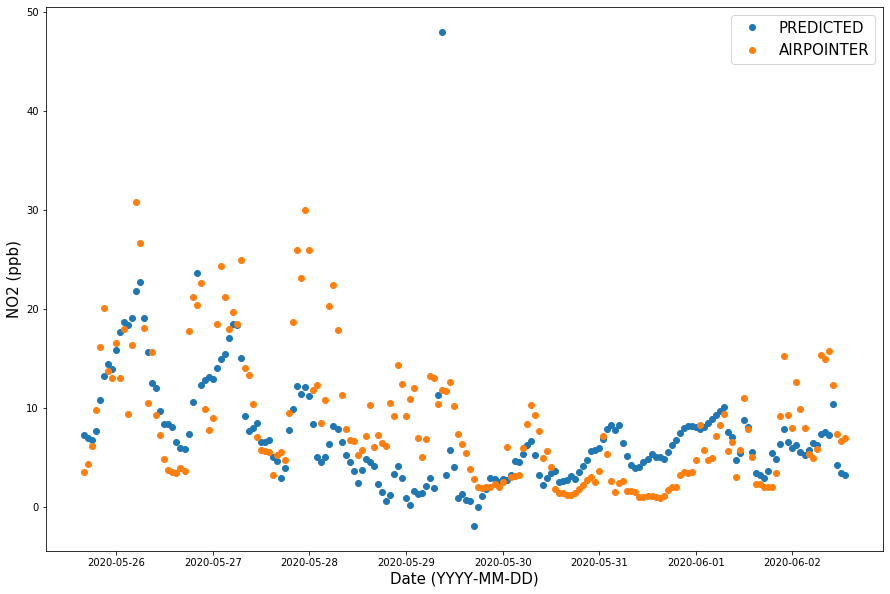

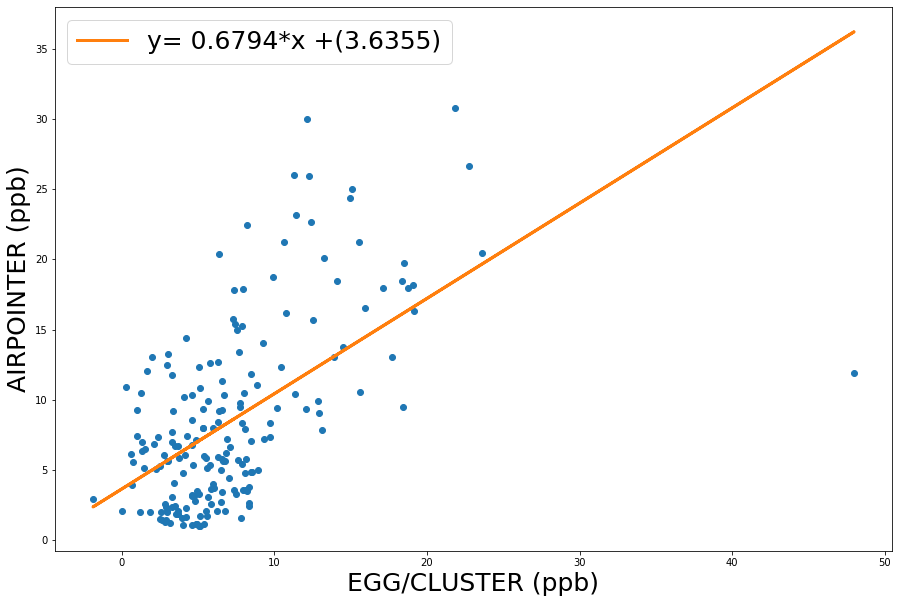

In [222]:
# Plot the time series graph
plt.figure(figsize=(15,10))
plt.plot(test_data.index.to_series(), elastic_net.predict(normed_test_data), 'o', label="PREDICTED")
plt.plot(test_data.index.to_series(), target_test, 'o', label='AIRPOINTER')
plt.xlabel('Date (YYYY-MM-DD)', fontsize=15)
plt.ylabel('NO2 (ppb)', fontsize=15)
plt.legend(loc='best', fontsize=15)

# Calculate a regression line
xValues = elastic_net.predict(DATA_test)
yValues = target_test
# Calculate a regression line
linear_regression = LinearRegression().fit(xValues.reshape(-1,1), yValues)
# Plot the values graph with the regression line
plt.figure(figsize=(15,10))
plt.plot(xValues, yValues, 'o')
plt.plot(xValues, 
         linear_regression.predict(xValues.reshape(-1,1)),
         label='y= {:0.4f}*x +({:0.4f})'.format(linear_regression.coef_[0], linear_regression.intercept_),
         linewidth=3)
plt.xlabel('EGG/CLUSTER (ppb)', fontsize=25)
plt.ylabel('AIRPOINTER (ppb)', fontsize=25)
plt.legend(loc='best', fontsize=25)

# Calculate the R2 score
metrics.r2_score(yValues, linear_regression.predict(xValues.reshape(-1,1)))

0.43177964324342233

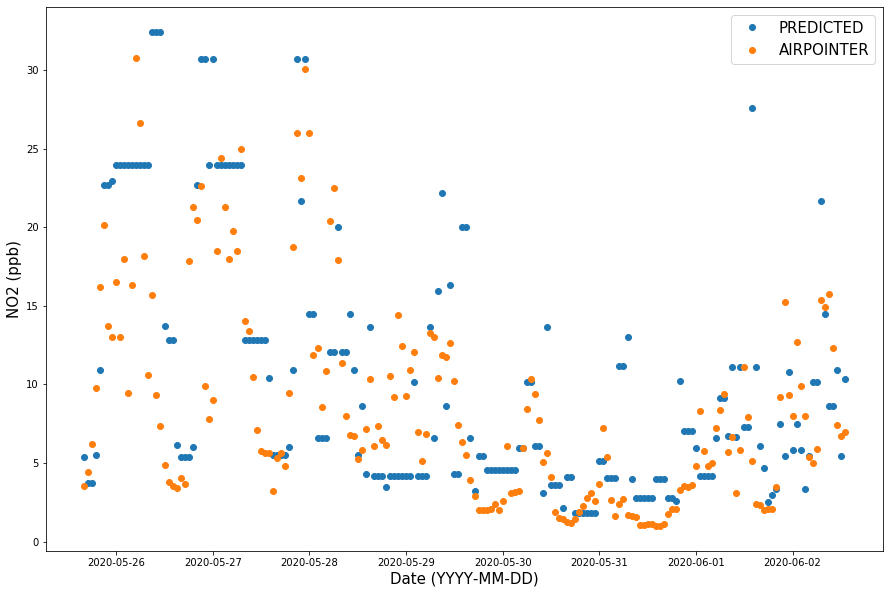

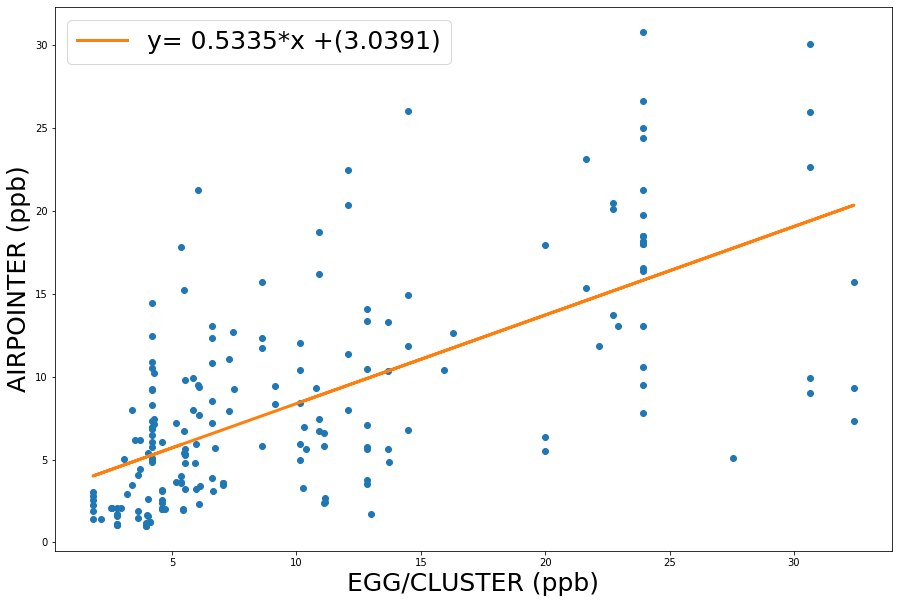

In [219]:
# Plot the time series graph
plt.figure(figsize=(15,10))
plt.plot(test_data.index.to_series(), decision_tree.predict(DATA_test), 'o', label="PREDICTED")
plt.plot(test_data.index.to_series(), target_test, 'o', label='AIRPOINTER')
plt.xlabel('Date (YYYY-MM-DD)', fontsize=15)
plt.ylabel('NO2 (ppb)', fontsize=15)
plt.legend(loc='best', fontsize=15)

# Calculate a regression line
xValues = decision_tree.predict(DATA_test)
yValues = target_test
# Calculate a regression line
linear_regression = LinearRegression().fit(xValues.reshape(-1,1), yValues)
# Plot the values graph with the regression line
plt.figure(figsize=(15,10))
plt.plot(xValues, yValues, 'o')
plt.plot(xValues, 
         linear_regression.predict(xValues.reshape(-1,1)),
         label='y= {:0.4f}*x +({:0.4f})'.format(linear_regression.coef_[0], linear_regression.intercept_),
         linewidth=3)
plt.xlabel('EGG/CLUSTER (ppb)', fontsize=25)
plt.ylabel('AIRPOINTER (ppb)', fontsize=25)
plt.legend(loc='best', fontsize=25)

# Calculate the R2 score
metrics.r2_score(yValues, linear_regression.predict(xValues.reshape(-1,1)))

In [318]:
#  ALL EGG PARAMETERS WITH NO2[ppb] and O3[ppb]
# ------------------------------------- BUILD TRAINING AND TEST SETS -------------------------------------
# Split the dataset into TRAINING and TESTING sets
train_dataset = drop_values(dataframe, dataframe.index, '2020-05-25 15:00:00', 0)
train_dataset = train_dataset.drop(columns=['NO', 'NOx', 
                                            'PM10_conc', 'PM10-2.5_conc','PM2.5_conc', 'O3', 
                                            'Air_Temperature', 'Relative_Humidity'])
test_dataset = drop_values(dataframe, dataframe.index, '2020-05-25 16:00:00', 1)
test_dataset = test_dataset.drop(columns=['NO', 'NOx', 
                                          'PM10_conc', 'PM10-2.5_conc','PM2.5_conc','O3', 
                                          'Air_Temperature', 'Relative_Humidity'])
train_stats = train_dataset.describe()
train_stats.pop("NO2")
train_stats = train_stats.transpose()
# Seperate the target values
# TRAINING SET
train_labels = train_dataset.pop('NO2')
# TESTING SET
test_labels = test_dataset.pop('NO2')

train_dataset.head()

,Temperature[degC],Humidity[percent],PM1.0[ug/m^3],PM2.5[ug/m^3],PM10.0[ug/m^3],O3[ppb],O3[V],NO2[ppb],NO2[V],Pressure[Pa]
2020-05-06 16:00:00,20.936500,19.845833,1.188333,2.235000,2.576667,50.088667,1.426638,159.735500,1.416693,99177.978333
2020-05-06 17:00:00,20.838500,19.497333,1.536667,2.705000,3.088333,49.248667,1.426650,146.279333,1.416790,99149.185000
2020-05-06 18:00:00,18.088000,21.523500,1.903333,3.203333,3.665000,51.494000,1.426415,126.373333,1.416782,99160.285000
2020-05-06 19:00:00,15.246833,25.020167,2.448333,3.898333,4.298333,53.309000,1.426180,115.848667,1.416693,99190.693333
2020-05-06 20:00:00,13.793333,23.878000,0.660000,1.293333,1.510000,50.617667,1.426136,97.193000,1.416746,99246.608333


TRAINING PERFORMANCE:
Training set score: 0.420549
MAE: 4.5034

TEST PERFROMANCE:
Training set score: 0.357420
MAE: 4.0042


Intercept: 9.266263157894782

R2: 0.42865097164645294


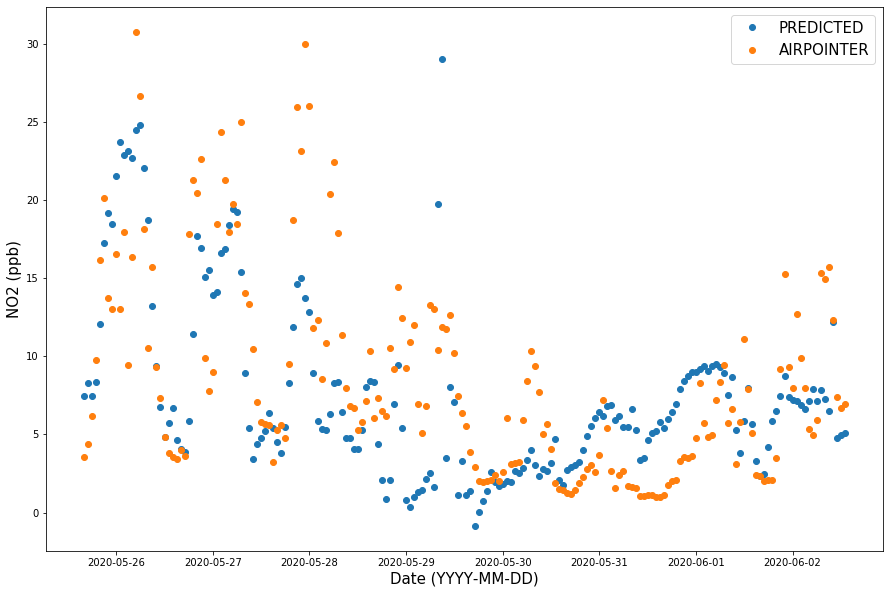

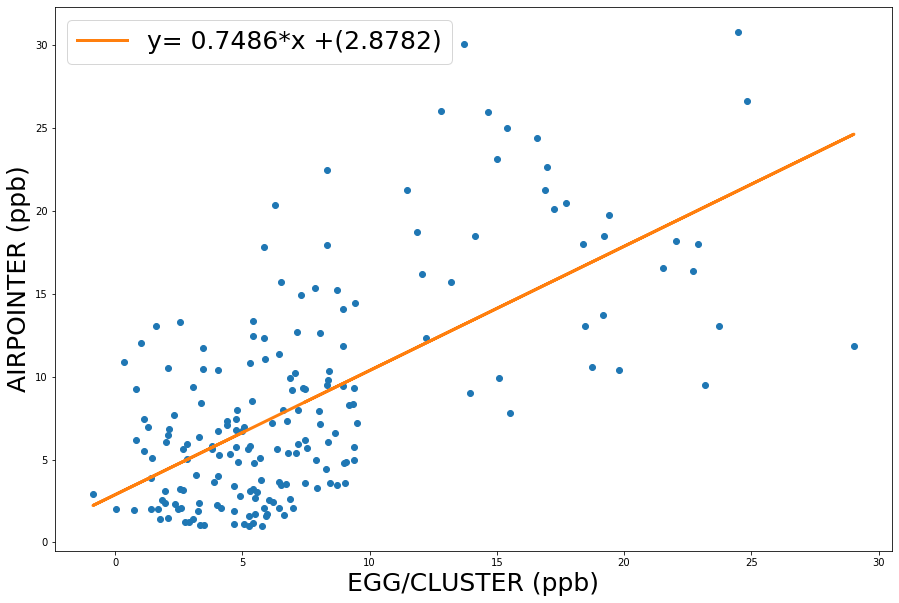

In [319]:
# --------------------------------- NORM THE DATASET -------------------------------
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
# --------------------------- TRAIN THE ELASTICNET MODEL ---------------------------
elastic_net = ElasticNet(alpha=0.001, max_iter=1000000).fit(normed_train_data, train_labels)
print("TRAINING PERFORMANCE:")
print("Training set score: {:0.6f}".format(elastic_net.score(normed_train_data, train_labels)))
print('MAE: {:0.4f}\n'.format(metrics.mean_absolute_error(train_labels, elastic_net.predict(normed_train_data))))
print("TEST PERFROMANCE:")
print("Training set score: {:0.6f}".format(elastic_net.score(normed_test_data, test_labels)))
print('MAE: {:0.4f}\n'.format(metrics.mean_absolute_error(test_labels, elastic_net.predict(normed_test_data))))
# for i in range(len(DATA_train_dataframe.columns)):
#     print("{}: {}".format(DATA_train_dataframe.columns[i], elastic_net.coef_[i]))
print("\nIntercept:", elastic_net.intercept_)

# Plot the time series graph
plt.figure(figsize=(15,10))
plt.plot(test_labels.index.to_series(), elastic_net.predict(normed_test_data), 'o', label="PREDICTED")
plt.plot(test_labels.index.to_series(), target_test, 'o', label='AIRPOINTER')
plt.xlabel('Date (YYYY-MM-DD)', fontsize=15)
plt.ylabel('NO2 (ppb)', fontsize=15)
plt.legend(loc='best', fontsize=15)

# Calculate a regression line
xValues = elastic_net.predict(normed_test_data)
yValues = target_test
# Calculate a regression line
linear_regression = LinearRegression().fit(xValues.reshape(-1,1), yValues)
# Plot the values graph with the regression line
plt.figure(figsize=(15,10))
plt.plot(xValues, yValues, 'o')
plt.plot(xValues, 
         linear_regression.predict(xValues.reshape(-1,1)),
         label='y= {:0.4f}*x +({:0.4f})'.format(linear_regression.coef_[0], linear_regression.intercept_),
         linewidth=3)
plt.xlabel('EGG/CLUSTER (ppb)', fontsize=25)
plt.ylabel('AIRPOINTER (ppb)', fontsize=25)
plt.legend(loc='best', fontsize=25)

# Calculate the R2 score
print("\nR2:", metrics.r2_score(yValues, linear_regression.predict(xValues.reshape(-1,1))))

In [316]:
#  ALL EGG PARAMETERS WITHOUT NO2[ppb] and O3 [ppb]
# ------------------------------------- BUILD TRAINING AND TEST SETS -------------------------------------
# Split the dataset into TRAINING and TESTING sets
train_dataset = drop_values(dataframe, dataframe.index, '2020-05-25 15:00:00', 0)
train_dataset = train_dataset.drop(columns=['NO', 'NOx', 'NO2[ppb]', 'O3[ppb]', 
                                            'PM10_conc', 'PM10-2.5_conc','PM2.5_conc', 'O3', 
                                            'Air_Temperature', 'Relative_Humidity'])
test_dataset = drop_values(dataframe, dataframe.index, '2020-05-25 16:00:00', 1)
test_dataset = test_dataset.drop(columns=['NO', 'NOx', 'NO2[ppb]', 'O3[ppb]',
                                          'PM10_conc', 'PM10-2.5_conc','PM2.5_conc','O3', 
                                          'Air_Temperature', 'Relative_Humidity'])
train_stats = train_dataset.describe()
train_stats.pop("NO2")
train_stats = train_stats.transpose()
# Seperate the target values
# TRAINING SET
train_labels = train_dataset.pop('NO2')
# TESTING SET
test_labels = test_dataset.pop('NO2')

train_dataset.head()

,Temperature[degC],Humidity[percent],PM1.0[ug/m^3],PM2.5[ug/m^3],PM10.0[ug/m^3],O3[V],NO2[V],Pressure[Pa]
2020-05-06 16:00:00,20.936500,19.845833,1.188333,2.235000,2.576667,1.426638,1.416693,99177.978333
2020-05-06 17:00:00,20.838500,19.497333,1.536667,2.705000,3.088333,1.426650,1.416790,99149.185000
2020-05-06 18:00:00,18.088000,21.523500,1.903333,3.203333,3.665000,1.426415,1.416782,99160.285000
2020-05-06 19:00:00,15.246833,25.020167,2.448333,3.898333,4.298333,1.426180,1.416693,99190.693333
2020-05-06 20:00:00,13.793333,23.878000,0.660000,1.293333,1.510000,1.426136,1.416746,99246.608333


TRAINING PERFORMANCE:
Training set score: 0.417923
MAE: 4.4840

TEST PERFROMANCE:
Training set score: 0.358987
MAE: 4.0341


Intercept: 9.266263157885428

R2: 0.4272778595394551


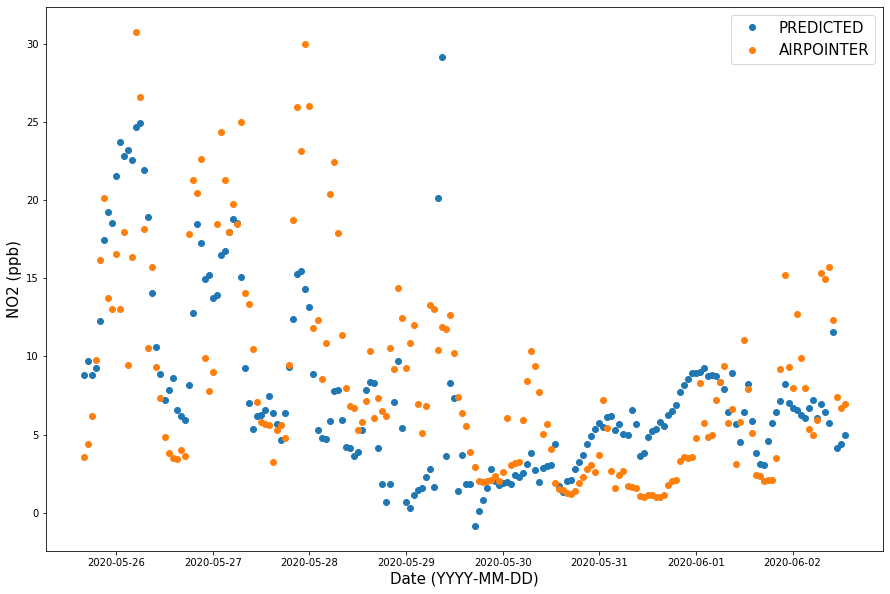

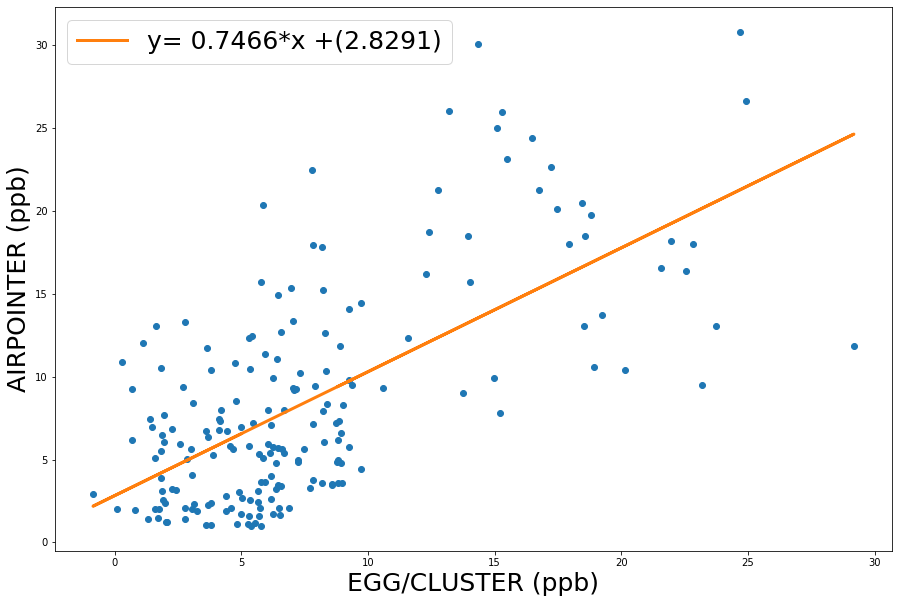

In [317]:
# --------------------------------- NORM THE DATASET -------------------------------
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
# --------------------------- TRAIN THE ELASTICNET MODEL ---------------------------
elastic_net = ElasticNet(alpha=0.001, max_iter=1000000).fit(normed_train_data, train_labels)
print("TRAINING PERFORMANCE:")
print("Training set score: {:0.6f}".format(elastic_net.score(normed_train_data, train_labels)))
print('MAE: {:0.4f}\n'.format(metrics.mean_absolute_error(train_labels, elastic_net.predict(normed_train_data))))
print("TEST PERFROMANCE:")
print("Training set score: {:0.6f}".format(elastic_net.score(normed_test_data, test_labels)))
print('MAE: {:0.4f}\n'.format(metrics.mean_absolute_error(test_labels, elastic_net.predict(normed_test_data))))
# for i in range(len(DATA_train_dataframe.columns)):
#     print("{}: {}".format(DATA_train_dataframe.columns[i], elastic_net.coef_[i]))
print("\nIntercept:", elastic_net.intercept_)

# Plot the time series graph
plt.figure(figsize=(15,10))
plt.plot(test_labels.index.to_series(), elastic_net.predict(normed_test_data), 'o', label="PREDICTED")
plt.plot(test_labels.index.to_series(), test_labels, 'o', label='AIRPOINTER')
plt.xlabel('Date (YYYY-MM-DD)', fontsize=15)
plt.ylabel('NO2 (ppb)', fontsize=15)
plt.legend(loc='best', fontsize=15)

# Calculate a regression line
xValues = elastic_net.predict(normed_test_data)
yValues = test_labels
# Calculate a regression line
linear_regression = LinearRegression().fit(xValues.reshape(-1,1), yValues)
# Plot the values graph with the regression line
plt.figure(figsize=(15,10))
plt.plot(xValues, yValues, 'o')
plt.plot(xValues, 
         linear_regression.predict(xValues.reshape(-1,1)),
         label='y= {:0.4f}*x +({:0.4f})'.format(linear_regression.coef_[0], linear_regression.intercept_),
         linewidth=3)
plt.xlabel('EGG/CLUSTER (ppb)', fontsize=25)
plt.ylabel('AIRPOINTER (ppb)', fontsize=25)
plt.legend(loc='best', fontsize=25)

# Calculate the R2 score
print("\nR2:", metrics.r2_score(yValues, linear_regression.predict(xValues.reshape(-1,1))))

In [320]:
#  TEMP HUMIDITY O3[V] NO2[V] PRESSURE[PA]
# ------------------------------------- BUILD TRAINING AND TEST SETS -------------------------------------
# Split the dataset into TRAINING and TESTING sets
train_dataset = drop_values(dataframe, dataframe.index, '2020-05-25 15:00:00', 0)
train_dataset = train_dataset.drop(columns=['NO', 'NOx', 'NO2[ppb]', 'O3[ppb]',
                                            'PM1.0[ug/m^3]', 'PM2.5[ug/m^3]', 'PM10.0[ug/m^3]',
                                            'PM10_conc', 'PM10-2.5_conc','PM2.5_conc', 'O3', 
                                            'Air_Temperature', 'Relative_Humidity'])
test_dataset = drop_values(dataframe, dataframe.index, '2020-05-25 16:00:00', 1)
test_dataset = test_dataset.drop(columns=['NO', 'NOx','NO2[ppb]', 'O3[ppb]',
                                          'PM1.0[ug/m^3]', 'PM2.5[ug/m^3]', 'PM10.0[ug/m^3]', 
                                          'PM10_conc', 'PM10-2.5_conc','PM2.5_conc','O3', 
                                          'Air_Temperature', 'Relative_Humidity'])
train_stats = train_dataset.describe()
train_stats.pop("NO2")
train_stats = train_stats.transpose()
# Seperate the target values
# TRAINING SET
train_labels = train_dataset.pop('NO2')
# TESTING SET
test_labels = test_dataset.pop('NO2')

train_dataset.head()

,Temperature[degC],Humidity[percent],O3[V],NO2[V],Pressure[Pa]
2020-05-06 16:00:00,20.936500,19.845833,1.426638,1.416693,99177.978333
2020-05-06 17:00:00,20.838500,19.497333,1.426650,1.416790,99149.185000
2020-05-06 18:00:00,18.088000,21.523500,1.426415,1.416782,99160.285000
2020-05-06 19:00:00,15.246833,25.020167,1.426180,1.416693,99190.693333
2020-05-06 20:00:00,13.793333,23.878000,1.426136,1.416746,99246.608333


TRAINING PERFORMANCE:
Training set score: 0.115413
MAE: 5.6454

TEST PERFROMANCE:
Training set score: 0.182812
MAE: 4.6917


Intercept: 9.266263157883808

R2: 0.20096111367769343


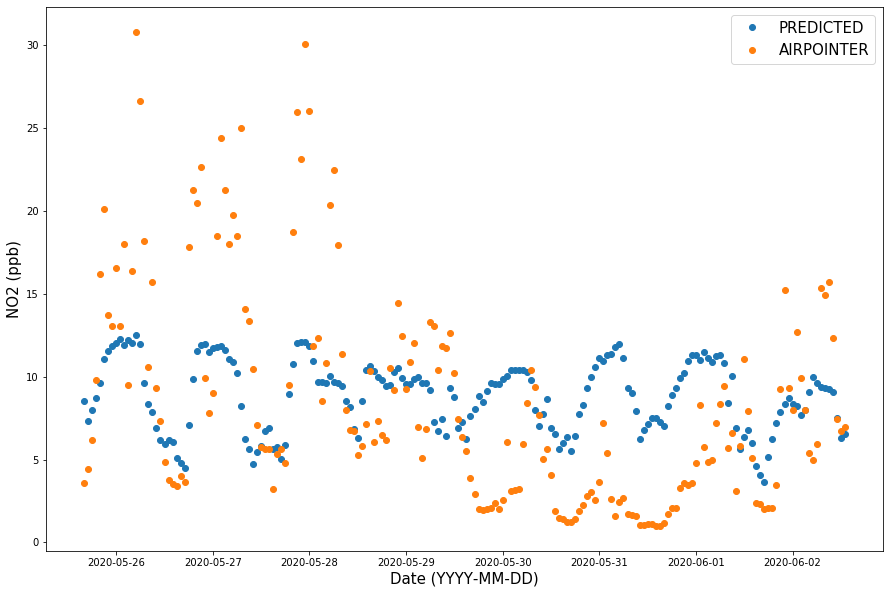

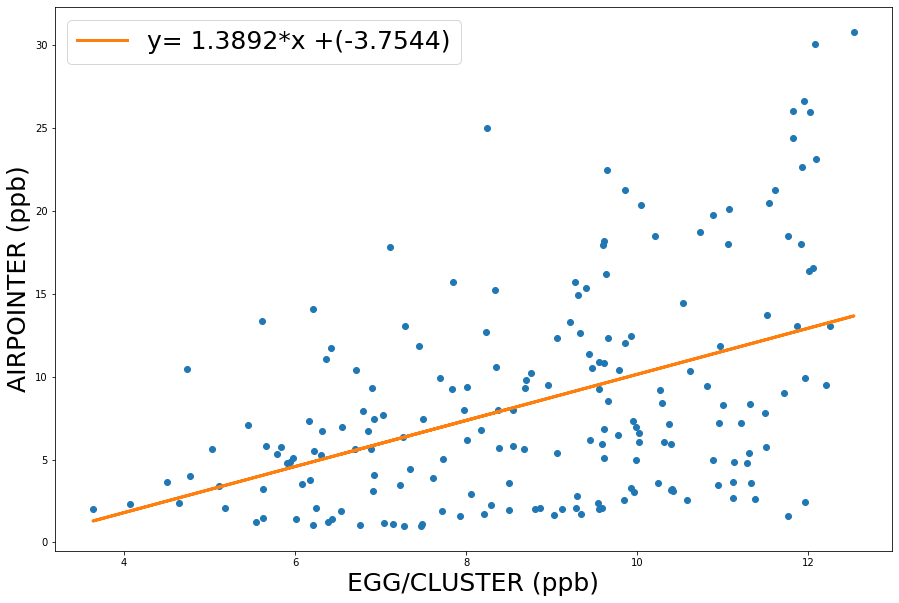

In [321]:
# --------------------------------- NORM THE DATASET -------------------------------
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
# --------------------------- TRAIN THE ELASTICNET MODEL ---------------------------
elastic_net = ElasticNet(alpha=0.001, max_iter=1000000).fit(normed_train_data, train_labels)
print("TRAINING PERFORMANCE:")
print("Training set score: {:0.6f}".format(elastic_net.score(normed_train_data, train_labels)))
print('MAE: {:0.4f}\n'.format(metrics.mean_absolute_error(train_labels, elastic_net.predict(normed_train_data))))
print("TEST PERFROMANCE:")
print("Training set score: {:0.6f}".format(elastic_net.score(normed_test_data, test_labels)))
print('MAE: {:0.4f}\n'.format(metrics.mean_absolute_error(test_labels, elastic_net.predict(normed_test_data))))
# for i in range(len(DATA_train_dataframe.columns)):
#     print("{}: {}".format(DATA_train_dataframe.columns[i], elastic_net.coef_[i]))
print("\nIntercept:", elastic_net.intercept_)

# Plot the time series graph
plt.figure(figsize=(15,10))
plt.plot(test_data.index.to_series(), elastic_net.predict(normed_test_data), 'o', label="PREDICTED")
plt.plot(test_data.index.to_series(), test_labels, 'o', label='AIRPOINTER')
plt.xlabel('Date (YYYY-MM-DD)', fontsize=15)
plt.ylabel('NO2 (ppb)', fontsize=15)
plt.legend(loc='best', fontsize=15)

# Calculate a regression line
xValues = elastic_net.predict(normed_test_data)
yValues = target_test
# Calculate a regression line
linear_regression = LinearRegression().fit(xValues.reshape(-1,1), yValues)
# Plot the values graph with the regression line
plt.figure(figsize=(15,10))
plt.plot(xValues, yValues, 'o')
plt.plot(xValues, 
         linear_regression.predict(xValues.reshape(-1,1)),
         label='y= {:0.4f}*x +({:0.4f})'.format(linear_regression.coef_[0], linear_regression.intercept_),
         linewidth=3)
plt.xlabel('EGG/CLUSTER (ppb)', fontsize=25)
plt.ylabel('AIRPOINTER (ppb)', fontsize=25)
plt.legend(loc='best', fontsize=25)

# Calculate the R2 score
print("\nR2:", metrics.r2_score(yValues, linear_regression.predict(xValues.reshape(-1,1))))

In [299]:
#  ALL EGG PARAMETERS and AIRPOINTER PARAMETERS
# ------------------------------------- BUILD TRAINING AND TEST SETS -------------------------------------
# Split the dataset into TRAINING and TESTING sets
train_dataset = drop_values(dataframe, dataframe.index, '2020-05-25 15:00:00', 0)
train_dataset = train_dataset.drop(columns=['NO', 'NOx'])
test_dataset = drop_values(dataframe, dataframe.index, '2020-05-25 16:00:00', 1)
test_dataset = test_dataset.drop(columns=['NO', 'NOx'])
train_stats = train_dataset.describe()
train_stats.pop("NO2")
train_stats = train_stats.transpose()
# Seperate the target values
# TRAINING SET
train_labels = train_dataset.pop('NO2')
# TESTING SET
test_labels = test_dataset.pop('NO2')

train_dataset.head()

,Temperature[degC],Humidity[percent],PM1.0[ug/m^3],PM2.5[ug/m^3],PM10.0[ug/m^3],O3[ppb],O3[V],NO2[ppb],NO2[V],Pressure[Pa],O3,PM10_conc,PM10-2.5_conc,PM2.5_conc,Air_Temperature,Relative_Humidity
2020-05-06 16:00:00,20.936500,19.845833,1.188333,2.235000,2.576667,50.088667,1.426638,159.735500,1.416693,99177.978333,40.473,15.705,11.404,4.303,12.375,27.602
2020-05-06 17:00:00,20.838500,19.497333,1.536667,2.705000,3.088333,49.248667,1.426650,146.279333,1.416790,99149.185000,40.592,19.672,15.035,4.628,12.848,26.503
2020-05-06 18:00:00,18.088000,21.523500,1.903333,3.203333,3.665000,51.494000,1.426415,126.373333,1.416782,99160.285000,39.162,21.342,16.181,5.170,12.150,27.662
2020-05-06 19:00:00,15.246833,25.020167,2.448333,3.898333,4.298333,53.309000,1.426180,115.848667,1.416693,99190.693333,35.057,16.456,11.442,5.010,11.400,28.912
2020-05-06 20:00:00,13.793333,23.878000,0.660000,1.293333,1.510000,50.617667,1.426136,97.193000,1.416746,99246.608333,38.341,13.062,9.670,3.400,10.556,26.898


TRAINING PERFORMANCE:
Training set score: 0.898047
MAE: 2.1257

TEST PERFROMANCE:
Training set score: 0.345626
MAE: 4.0736


Intercept: 9.266263157901747

R2: 0.46804815567191815


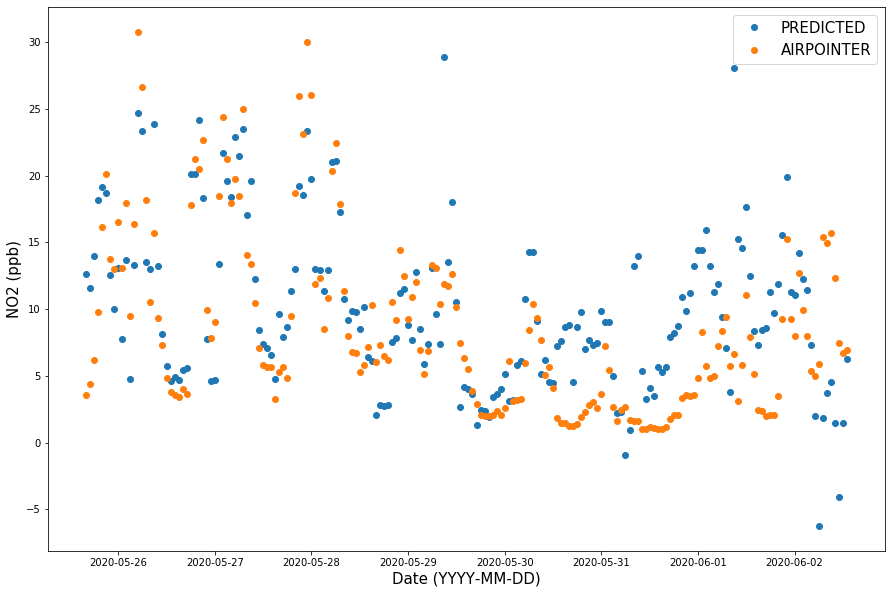

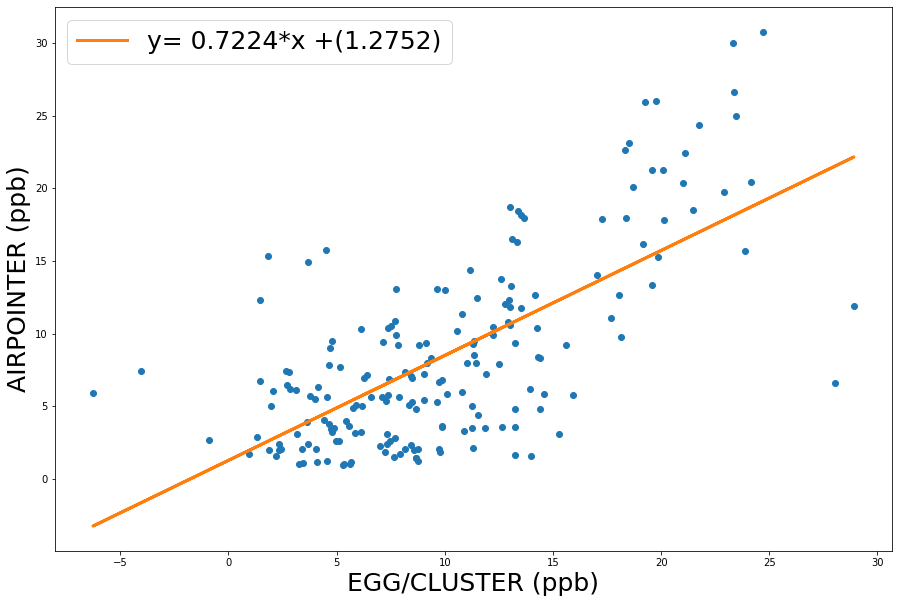

In [300]:
# --------------------------------- NORM THE DATASET -------------------------------
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
# --------------------------- TRAIN THE ELASTICNET MODEL ---------------------------
elastic_net = ElasticNet(alpha=0.001, max_iter=1000000).fit(normed_train_data, train_labels)
print("TRAINING PERFORMANCE:")
print("Training set score: {:0.6f}".format(elastic_net.score(normed_train_data, train_labels)))
print('MAE: {:0.4f}\n'.format(metrics.mean_absolute_error(train_labels, elastic_net.predict(normed_train_data))))
print("TEST PERFROMANCE:")
print("Training set score: {:0.6f}".format(elastic_net.score(normed_test_data, test_labels)))
print('MAE: {:0.4f}\n'.format(metrics.mean_absolute_error(test_labels, elastic_net.predict(normed_test_data))))
# for i in range(len(DATA_train_dataframe.columns)):
#     print("{}: {}".format(DATA_train_dataframe.columns[i], elastic_net.coef_[i]))
print("\nIntercept:", elastic_net.intercept_)

# Plot the time series graph
plt.figure(figsize=(15,10))
plt.plot(test_data.index.to_series(), elastic_net.predict(normed_test_data), 'o', label="PREDICTED")
plt.plot(test_data.index.to_series(), target_test, 'o', label='AIRPOINTER')
plt.xlabel('Date (YYYY-MM-DD)', fontsize=15)
plt.ylabel('NO2 (ppb)', fontsize=15)
plt.legend(loc='best', fontsize=15)

# Calculate a regression line
xValues = elastic_net.predict(normed_test_data)
yValues = target_test
# Calculate a regression line
linear_regression = LinearRegression().fit(xValues.reshape(-1,1), yValues)
# Plot the values graph with the regression line
plt.figure(figsize=(15,10))
plt.plot(xValues, yValues, 'o')
plt.plot(xValues, 
         linear_regression.predict(xValues.reshape(-1,1)),
         label='y= {:0.4f}*x +({:0.4f})'.format(linear_regression.coef_[0], linear_regression.intercept_),
         linewidth=3)
plt.xlabel('EGG/CLUSTER (ppb)', fontsize=25)
plt.ylabel('AIRPOINTER (ppb)', fontsize=25)
plt.legend(loc='best', fontsize=25)

# Calculate the R2 score
print("\nR2:", metrics.r2_score(yValues, linear_regression.predict(xValues.reshape(-1,1))))